# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [52]:
# all imports for the notebook
import pickle
import numpy as np
import tensorflow as tf
import random 
import pandas as pd 
import math
import cv2
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from skimage import exposure
from skimage.filters import rank
from skimage.morphology import disk
import matplotlib.pyplot as plt
%matplotlib inline 

In [53]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [54]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

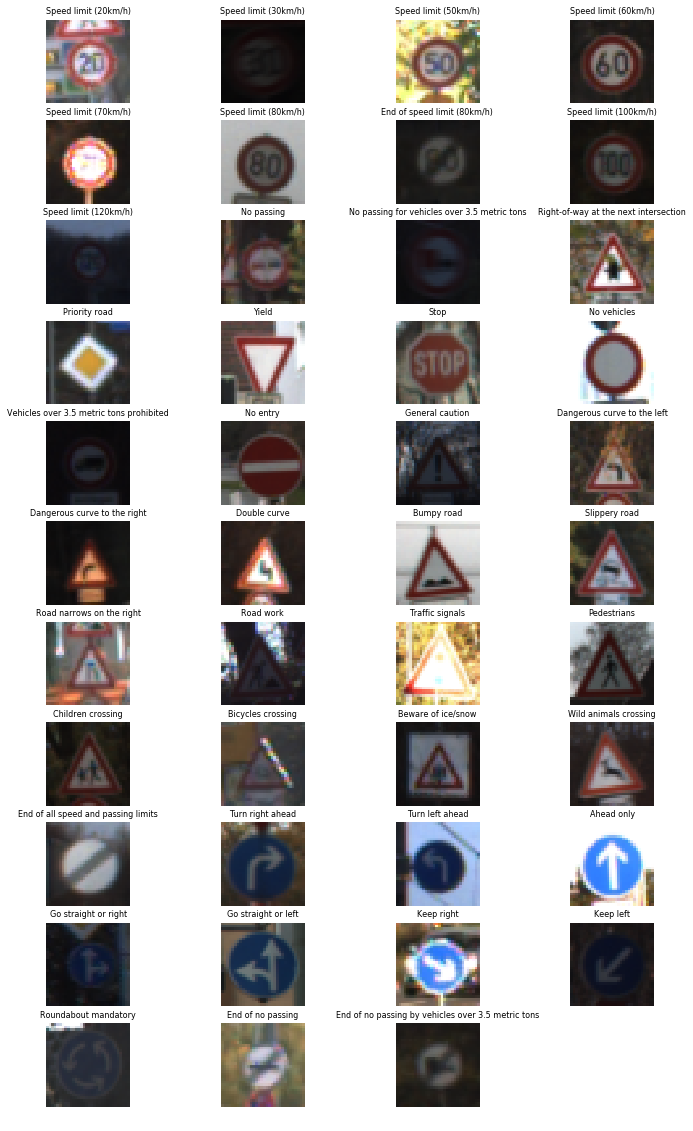

In [55]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
sn = pd.read_csv('./signnames.csv') 
signnames = list(sn.SignName) 
def show_image(location,title,img):    
    plt.subplot(*location)    
    plt.title(title,fontsize=8)    
    plt.axis('off')    
    if len(img.shape) == 3:        
        plt.imshow(img)    
    else:        
        plt.imshow(img, cmap='gray') 

        # plot random set of images for each sign class 
plt.figure(figsize=(12,20)) 
for sign in range(n_classes):    
    [index] = random.sample(list(np.where(y_train == sign)[0]),1)  
    show_image((11, 4, sign + 1), signnames[sign], X_train[index])
plt.savefig('example_signs.png')

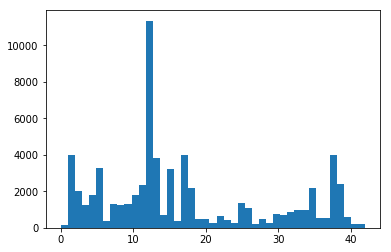

In [101]:
plt.hist(y_train, bins = n_classes)
plt.savefig('hist.png')
plt.show()

## Observations on the data
There seems to be a huge variation in the brightness of the images. Let's look into this a bit more. The next function displays the darkest and brightest images of a given class.

In [56]:
def show_image(location,img):    
    plt.subplot(*location)      
    plt.axis('off')    
    if len(img.shape) == 3:        
        plt.imshow(img)    
    else:        
        plt.imshow(img, cmap='gray') 

rgb2gray = np.array([.299,.587,.114])
def dark_vs_light(index):
    indices = np.where(y_train == index)[0]
    subset = X_train[indices]
    Y = np.einsum('ijkl,l->ijk',subset,rgb2gray)
    s = np.average(Y, axis=(1,2))
    dark_indices = [b for (a,b) in sorted(zip(s,indices))]
    plt.figure(figsize=(20,5)) 
    for i in range(10):
        show_image((2,10,i+1),X_train[dark_indices[i]])
        show_image((2,10,10+i+1),X_train[dark_indices[-1-i]])
    return s, dark_indices  

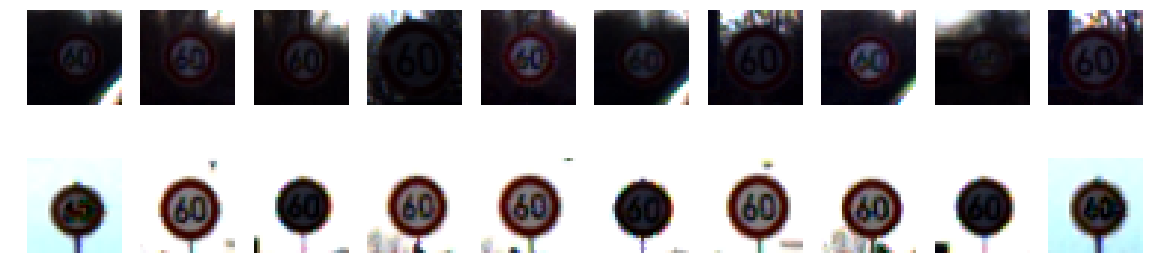

In [92]:
s, dark_indices = dark_vs_light(3)

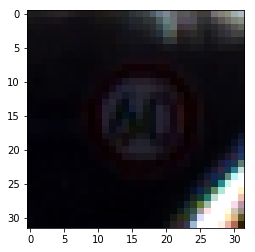

In [94]:
plt.imshow(X_train[dark_indices[0]])
plt.savefig('dark60.png')

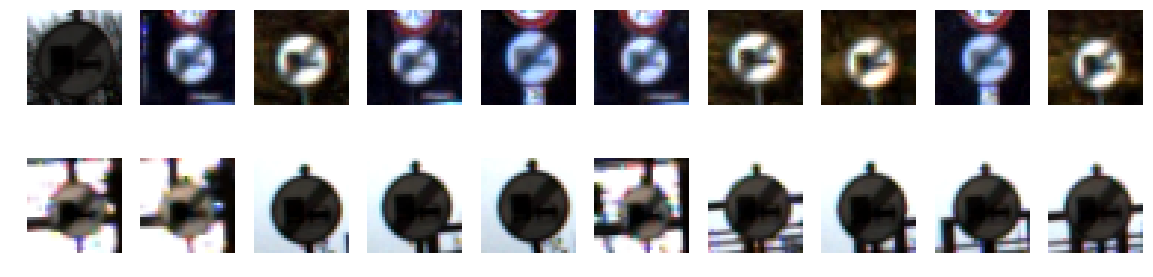

In [105]:
s, dark_indices = dark_vs_light(42)

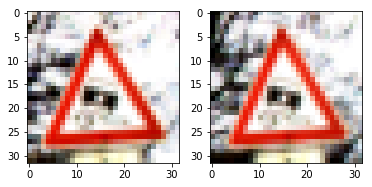

In [99]:
plt.subplot(1,2,1)
plt.imshow(X_train[dark_indices[-1]])
plt.subplot(1,2,2)
plt.imshow(X_train[dark_indices[-4]])
plt.savefig('similar.png')

## Contrast Enhancement
Now we look at some strategies to enhance the contrast in an image.  We compare several functions available in the skimage library: grayscale, localized histogram equalization, global histogram equalization, adaptive histogram equalization, and contrast stretching.

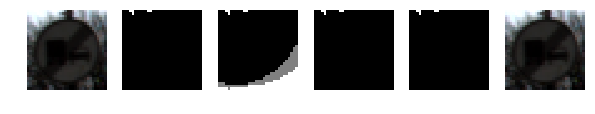

In [109]:
s= sorted(s)
plt.figure(figsize=(10,3))
k = 1
cols = 6
for n in range(k):
    img = X_train[dark_indices[n]]
    gray = np.einsum('ijl,l->ij',img,rgb2gray).astype(np.uint8)
    # localized histogram equalization
    selem = disk(30)
    transformed1 = rank.equalize(gray, selem=selem)
    # global histogram equalization
    transformed2 = exposure.equalize_hist(gray)
    # adaptive histogram equalization
    transformed3 = exposure.equalize_adapthist(gray)
    # Contrast stretching
    p2, p98 = np.percentile(img, (2, 98))
    transformed4 = exposure.rescale_intensity(img, in_range=(p2, p98))
    show_image((k,cols,1+cols*n),img)
    show_image((k,cols,2+cols*n),gray)
    show_image((k,cols,3+cols*n),transformed1)
    show_image((k,cols,4+cols*n),transformed2)
    show_image((k,cols,5+cols*n),transformed3)
    show_image((k,cols,6+cols*n),transformed4)
    plt.savefig('contrast.png')

I think the contrast stretching (the last column) looks best, so we will go with that.  

In [57]:
def contrast_stretching(X):
    shape = X.shape
    Y = np.empty(shape)
    for i in range(shape[0]):
        img = X[i]
        p2, p98 = np.percentile(img, (2,98))
        modified = exposure.rescale_intensity(img, in_range=(p2,p98))
        Y[i] = modified
    return(Y)

Now we look at augmenting the data set by adding random translations, rotations, scaling, brightness modification,
and changes of perspective

In [23]:
def jitter(X, angle_limit = 10, trans_limit = 2, scale_limit = 0.1, warp_limit = .005, bright_limit = 0.2):
    X = X.astype(np.uint8)
    shape = X.shape
    Y = np.empty(shape)
    rows, cols = shape[1], shape[2]
    center = np.array([[cols/2.], [rows/2.]])
    for i in range(shape[0]):
        img = X[i]
        angle = np.random.uniform(low = -1, high = 1)*angle_limit*math.pi/180
        trans = np.random.uniform(low = -1, high = 1, size = (2,1))*trans_limit
        scale = np.random.uniform(low = -1, high = 1)*scale_limit + 1
        alpha = scale*math.cos(angle)
        beta = scale*math.sin(angle)
        M = np.array([[alpha, -beta],[beta, alpha]], np.float32)
        # warpAffine expects a 2-by-3 matrix [M|b], and performs Mx + b
        # We want M(x-center) + center + trans, thus b = center + trans - M*center
        b = center + trans - np.matmul(M,center)
        W = np.concatenate((M,b),1)
        warp = np.random.uniform(low = -1, high = 1, size=2)*warp_limit
        warp = np.concatenate((warp,[1]))
        warp = warp.reshape((1,3))
        W = np.concatenate((W,warp),0)
        new_img = cv2.warpPerspective(img,W,(cols,rows),borderMode=cv2.BORDER_REFLECT_101)
        # brightness modification
        yuv = cv2.cvtColor(new_img, cv2.COLOR_RGB2YUV)
        y,u,v = cv2.split(yuv)
        y = y*(1 + bright_limit*np.random.uniform(low = -1, high = 1))
        y = np.clip(y,0,255).astype(np.uint8)
        new_img = cv2.cvtColor(cv2.merge([y,u,v]), cv2.COLOR_YUV2RGB)
        new_img = new_img/255. - .5
        Y[i] = new_img
    return(Y)

NameError: name 'jitter' is not defined

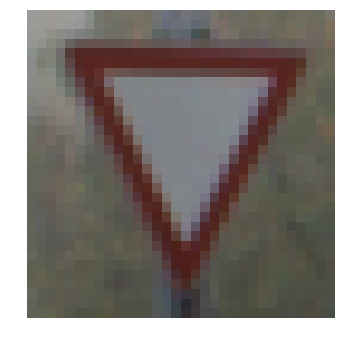

In [58]:
indices = np.random.randint(X_train.shape[0],size = 4)

plt.figure(figsize=(32,32)) 
for i in range(len(indices)):
    img = X_train[indices[i]].astype(np.uint8)
    show_image((4, 5, i*5+1), img)
    img = img.reshape((1,32,32,3))
    X = np.concatenate((img,img,img,img),0)
    Y = jitter(X)
    Y = (Y+.5)*255
    Y = Y.astype(np.uint8)
    for j in range(4):
        show_image((4,5, i*5 + j +2), Y[j])

We form an extended training set by adding flipped versions of signs that are still meaningful after being 
flipped either horizontally, vertically, or diagonally.

In [4]:
# note: we already created the extended training set earlier, so we don't actually run this cell here
# we adapted this function from http://navoshta.com/traffic-signs-classification/
# we added classes that are invariant under taking the transpose, and those invariant 
# under flipping about the anti-diagonal

# images that can be flipped left to right without changing class 
flip_lr = np.array([11,12,13,15,17,18,22,26,30,35])

# images that can be vertically flipped
flip_ud = np.array([1,5,12,15,17])

#images preserved when flipped vertically and horizontally
flip_both = np.array([12,15,32,17,40])

# image pairs that when flipped left to right switch between themselves
flip_switch = np.array([[19,20],[33,34],[36,37],[38,39],[20,19],[34,33],[37,36],[39,38]])

# images preserved by transpose
flip_transpose = [12,15,32,38]

# images preserved when reflected in the anti-diagonal
flip_anti = [12,15,32,39]

X_extended = np.empty((0,32,32,3), dtype = np.uint8)
y_extended = np.empty((0), dtype = np.int32)

for i in range(num_classes):
    S = X_train[y_train == i]
    num = S.shape[0]
    X_extended = np.concatenate((X_extended,S))
    y_extended = np.concatenate((y_extended,i*np.ones(num)))

    if i in flip_lr:
        Slr = S[:,:,::-1,:]
        X_extended = np.concatenate((X_extended,Slr))
        y_extended = np.concatenate((y_extended,i*np.ones(num)))

    if i in flip_ud:
        Sud = S[:,::-1,:,:]
        X_extended = np.concatenate((X_extended,Sud))
        y_extended = np.concatenate((y_extended,i*np.ones(num)))

    if i in flip_both:
        Sboth = S[:,::-1,::-1,:]
        X_extended = np.concatenate((X_extended,Sboth))
        y_extended = np.concatenate((y_extended,i*np.ones(num)))

    if i in flip_transpose:
        Str = np.transpose(S,(0,2,1,3))
        X_extended = np.concatenate((X_extended,Str))
        y_extended = np.concatenate((y_extended,i*np.ones(num)))

    if i in flip_anti:
        Sboth = S[:,::-1,::-1,:]
        Santi = np.transpose(Sboth,(0,2,1,3))
        X_extended = np.concatenate((X_extended,Santi))
        y_extended = np.concatenate((y_extended,i*np.ones(num)))

    if i in flip_switch[:,0]:
        partner = flip_switch[flip_switch[:,0] == i][0][1]
        Slr = S[:,:,::-1,:]
        X_extended = np.concatenate((X_extended,Slr))
        y_extended = np.concatenate((y_extended,partner*np.ones(num)))

extended_train = {'features':X_extended, 'labels':y_extended}
pickle.dump(extended_train, open(output_file, 'wb'))

In [59]:
# load extended training set
training_file = './traffic-signs-data/extended_train.p'
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']

In [60]:
# contrast stretching preprocessing
X_train = contrast_stretching(X_train)
X_valid = contrast_stretching(X_valid)
X_test = contrast_stretching(X_test)

# X_train is centered in the jitter function
X_valid = X_valid/255. - 0.5
X_test = X_test/255. - 0.5

### Model Architecture

In [61]:
# Define helper functions for creating the model
def xavier(shape):
    shape = np.array(shape)
    prod = np.prod(shape[:-1])
    return np.sqrt(2/prod)

def dense(input, size):
    shape = input.get_shape().as_list()
    dims = [shape[1],size]
    weights = tf.get_variable('weights', shape = dims,
        initializer = tf.truncated_normal_initializer(stddev = xavier(dims)))
    biases = tf.get_variable('biases', shape = [size],
        initializer = tf.constant_initializer(0.1))
    return tf.matmul(input, weights) + biases

def dense_relu(input, size):
    return tf.nn.relu(dense(input, size))

def conv_relu(input, depth, kernel_size = 3, pad = 'SAME', stride = 1):
    shape = input.get_shape().as_list()
    dims = [kernel_size, kernel_size, shape[3], depth]
    weights = tf.get_variable('weights', shape = dims,
        initializer = tf.truncated_normal_initializer(stddev = xavier(dims)))
    biases = tf.get_variable('biases', shape = [depth],
        initializer = tf.constant_initializer(0.1))
    conv = tf.nn.conv2d(input, weights, strides = [1,stride,stride,1], padding = pad, name = 'conv')
    return tf.nn.relu(conv + biases)

def pool(input, size = 2):
    return tf.nn.max_pool(input, ksize = [1, size, size, 1],
        strides = [1, size, size, 1], padding = 'VALID')

In [62]:
# Model Definition
# VGG style model using two 3x3 convolutions in each block
# we take the outputs from each convolutional block, flatten and concatenate them to
# feed into the dense layer
def net(x):
    depth1 = 32
    depth2 = 64
    depth3 = 128
    
    # Initial 1x1 Convolution to combine R,G,B channels into one channel
    with tf.variable_scope('conv0'):
        conv0 = conv_relu(x, 1, kernel_size = 1)
    
    # First convolutional block.  Apply 3x3 filters twice, followed by pooling
    with tf.variable_scope('conv1a'):
        conv1a = conv_relu(conv0, depth1)
    with tf.variable_scope('conv1b'):
        conv1b = conv_relu(conv1a, depth1)
        pool1 = pool(conv1b)

    # Second convolutional block.  Apply 3x3 filters twice, followed by pooling
    with tf.variable_scope('conv2a'):
        conv2a = conv_relu(pool1, depth2)
    with tf.variable_scope('conv2b'):
        conv2b = conv_relu(conv2a, depth2)
        pool2 = pool(conv2b)
    
    # Third convolutional block.  Apply 3x3 filters twice, followed by pooling
    with tf.variable_scope('conv3a'):
        conv3a = conv_relu(pool2, depth3)
    with tf.variable_scope('conv3b'):
        conv3b = conv_relu(conv3a, depth3)
        pool3 = pool(conv3b)

    # prepare outputs from each conv layer to be fed into dense layers
    # 1st layer output
    pool1 = pool(pool1, size = 4)
    pool1 = flatten(pool1)

    # 2nd layer output
    pool2 = pool(pool2)
    pool2 = flatten(pool2)
    
    # 3rd layer output
    pool3 = flatten(pool3)

    v = tf.concat(1, [pool1, pool2, pool3])
    v_drop = tf.nn.dropout(v, keep_prob)

    # Dense layers
    with tf.variable_scope('dense4'):
        dense4 = dense_relu(v_drop, 512)
        dense4_drop = tf.nn.dropout(dense4, keep_prob)

    with tf.variable_scope('logits'):
        logits = dense(dense4_drop, 43)

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [63]:
tf.reset_default_graph()
BATCH_SIZE = 128
# initial rate 0.001
rate = 0.001

# define placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

logits = net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [24]:
# Do not rerun this cell!
def evaluate(X_data, y_data, prob):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        #iter = int(offset/BATCH_SIZE)
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy,loss = sess.run([accuracy_operation, loss_operation],
            feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    total_accuracy = total_accuracy / num_examples
    total_loss = total_loss / num_examples
    return total_accuracy, total_loss

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print(num_examples)

    iter_num = 0
    patience = 0
    best_valid_loss = 1

    print("Training...")
    print()
    while patience <= 20:
        iter_num += 1
        X_train, y_train = shuffle(X_train, y_train)
        X_jitter = jitter(X_train)
        total_acc = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            #iter = int(offset/BATCH_SIZE)
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_jitter[offset:end], y_train[offset:end]
            _, acc = sess.run([training_operation, accuracy_operation],
                feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            total_acc += (acc * len(batch_x))
        validation_accuracy, validation_loss = evaluate(X_valid, y_valid, 1.0)
        total_acc = total_acc/num_examples

        if validation_loss <= best_valid_loss:
            patience = 0
            best_valid_loss = validation_loss
            saver.save(sess, './vgg_jupyter')
        else: patience += 1
        print("Iteration {} ...".format(iter_num))
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print("Validation Loss = {:.4f}".format(validation_loss))
        print("Training Accuracy = {:.4f}".format(total_acc))
        print()

67198
Training...

Iteration 1 ...
Validation Accuracy = 0.7909
Validation Loss = 0.6396
Training Accuracy = 0.5600

Iteration 2 ...
Validation Accuracy = 0.9424
Validation Loss = 0.1882
Training Accuracy = 0.8610

Iteration 3 ...
Validation Accuracy = 0.9712
Validation Loss = 0.0884
Training Accuracy = 0.9383

Iteration 4 ...
Validation Accuracy = 0.9821
Validation Loss = 0.0555
Training Accuracy = 0.9623

Iteration 5 ...
Validation Accuracy = 0.9857
Validation Loss = 0.0545
Training Accuracy = 0.9732

Iteration 6 ...
Validation Accuracy = 0.9896
Validation Loss = 0.0298
Training Accuracy = 0.9793

Iteration 7 ...
Validation Accuracy = 0.9898
Validation Loss = 0.0382
Training Accuracy = 0.9822

Iteration 8 ...
Validation Accuracy = 0.9918
Validation Loss = 0.0262
Training Accuracy = 0.9851

Iteration 9 ...
Validation Accuracy = 0.9939
Validation Loss = 0.0240
Training Accuracy = 0.9863

Iteration 10 ...
Validation Accuracy = 0.9937
Validation Loss = 0.0212
Training Accuracy = 0.9870



In [13]:
X_test = contrast_stretching(X_test)
X_test = X_test/255. -.5

In [43]:
with tf.Session() as sess:
    saver.restore(sess, './vgg_jupyter')
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1.0})

print('Test Accuracy: {:.4f}'.format(test_accuracy))

Test Accuracy: 0.9808


In [19]:
prob   = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, './vgg_jupyter')
    output = sess.run(prob, feed_dict={x: X_test[:10], keep_prob : 1.0})

print(np.argmax(output,1))

[16  1 38 33 11 38 18 12 25 35]


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [9]:
new = np.empty([6,32,32,3], np.uint8)
for i in range(1,7):
    filename = 'image'+str(i)+'.jpeg'
    img = cv2.imread(filename,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32,32),interpolation = cv2.INTER_AREA)
    new[i-1] = img

In [11]:
for i in range(6):
    show_image((1,6,i+1),new[i])

TypeError: show_image() missing 1 required positional argument: 'img'

### Predict the Sign Type for Each Image

In [10]:
# Preprocess the images
new = contrast_stretching(new)
new = new/255. - 0.5
print(new.shape)

(6, 32, 32, 3)


In [11]:
prob   = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, './vgg_jupyter')
    output = sess.run(prob, feed_dict={x: new, keep_prob : 1.0})

predictions = np.argmax(output,1)

In [14]:
print(output)

[[  4.37791320e-03   9.93964477e-06   1.90347578e-07   5.72715749e-07
    1.93532833e-06   1.82606328e-07   1.01259079e-09   5.72756953e-08
    2.41172347e-05   4.36397211e-04   4.34155965e-08   7.08213506e-08
    1.16539613e-05   5.55477975e-09   6.17029414e-08   2.85366223e-05
    1.29286218e-06   7.22718729e-09   4.12600627e-03   5.31469285e-03
    4.55927895e-03   7.54434453e-08   3.33180986e-02   9.28835928e-01
    1.96492347e-05   5.01108516e-05   8.75148980e-04   2.29327046e-09
    1.16736672e-04   1.78153999e-02   2.06953027e-05   2.21297851e-05
    1.72234786e-06   1.15071309e-07   2.31578895e-07   8.81723099e-06
    3.30262452e-07   3.38657378e-06   1.96243079e-07   5.91006666e-09
    3.94524662e-08   1.81576033e-05   2.37085063e-09]
 [  0.00000000e+00   2.02311653e-38   0.00000000e+00   1.25710493e-26
    0.00000000e+00   4.74839488e-25   1.47672106e-37   1.99761010e-38
    0.00000000e+00   0.00000000e+00   3.26609887e-25   1.00000000e+00
    3.02401889e-22   2.26638295e-35 

### Analyze Performance

In [12]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
for i in range(len(predictions)):
    print('Prediction for image '+str(i)+' is: '+signnames[predictions[i]])

Prediction for image 0 is: Slippery road
Prediction for image 1 is: Right-of-way at the next intersection
Prediction for image 2 is: Dangerous curve to the left
Prediction for image 3 is: Bumpy road
Prediction for image 4 is: Stop
Prediction for image 5 is: No entry


The prediction is correct for images 1, 3, 4, 5. The prediction is wrong on image 0, which should be general caution, and image 2, which should be slippery road.  Overall the accuracy is about 66%.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [13]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for i in range(len(output)):
    print('Image '+str(i)+' probabilities:')
    top_five = np.argsort(output[i])[::-1][:5]
    for j in range(len(top_five)):
        print(signnames[top_five[j]] + ' with prob {:.3f}'.format(output[i][top_five[j]]))
    print()

Image 0 probabilities:
Slippery road with prob 0.929
Bumpy road with prob 0.033
Bicycles crossing with prob 0.018
Dangerous curve to the left with prob 0.005
Dangerous curve to the right with prob 0.005

Image 1 probabilities:
Right-of-way at the next intersection with prob 1.000
Beware of ice/snow with prob 0.000
Priority road with prob 0.000
General caution with prob 0.000
Speed limit (80km/h) with prob 0.000

Image 2 probabilities:
Dangerous curve to the left with prob 0.723
Double curve with prob 0.250
Wild animals crossing with prob 0.025
Slippery road with prob 0.001
Beware of ice/snow with prob 0.000

Image 3 probabilities:
Bumpy road with prob 1.000
Bicycles crossing with prob 0.000
Road work with prob 0.000
No vehicles with prob 0.000
Dangerous curve to the right with prob 0.000

Image 4 probabilities:
Stop with prob 1.000
Speed limit (60km/h) with prob 0.000
Yield with prob 0.000
Turn right ahead with prob 0.000
Keep right with prob 0.000

Image 5 probabilities:
No entry with

We see that on images 1,3,4 the algorithm was correct and also very sure of itself.  On image 2, which the algorithm got wrong, the correct answer slippery road was at least in the top 5.

[  1.00000000e+00   5.38155063e-21   3.02401889e-22   4.34230773e-24
   4.74839488e-25]
['Right-of-way at the next intersection', 'Beware of ice/snow', 'Priority road', 'General caution', 'Speed limit (80km/h)']


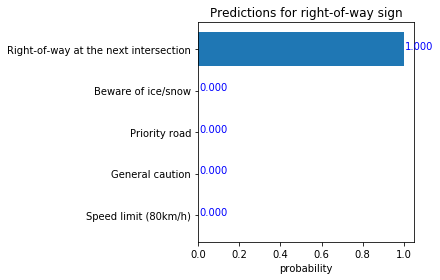

In [49]:
i=1
top_five = np.argsort(output[i])[::-1][:5]
to_plot = output[i][top_five]
print(to_plot)
top_five_names = []
for j in range(5):
    top_five_names.append(signnames[top_five[j]])
print(top_five_names)
pos = np.arange(5)+.5
plt.figure(1)
plt.barh(pos,to_plot[::-1])
plt.yticks(pos, top_five_names[::-1])
plt.xlabel('probability')
plt.title('Predictions for right-of-way sign')
for t, v in enumerate(to_plot[::-1]):
    plt.text(v + .005, pos[t], "{:.3f}".format(v), color='blue')
#plt.tight_layout()
plt.gcf().subplots_adjust(left=0.35)
plt.tight_layout()
filename = 'sign'+str(i)+'_pred.png'
plt.savefig(filename)

In [38]:
plt.yticks

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]),
 ('Slippery road',
  'Bumpy road',
  'Bicycles crossing',
  'Dangerous curve to the left',
  'Dangerous curve to the right'))

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [16]:
def outputFeatureMap(img):
    # conv2d doesn't take float64
    # https://github.com/tensorflow/tensorflow/issues/5539
    img = img.astype(np.float32)
    # we want a 4 dimensional input
    img = img.reshape(1,32,32,3)
    with tf.Session() as sess:
        saver.restore(sess, './vgg_jupyter')
        weights0 = sess.graph.get_tensor_by_name('conv0/weights/read:0').eval()
        layer0 = tf.nn.conv2d(img, weights0, strides = [1,1,1,1], padding = 'SAME')
        weights1a = sess.graph.get_tensor_by_name('conv1a/weights/read:0').eval()
        layer1a = tf.nn.conv2d(layer0, weights1a, strides = [1,1,1,1], padding = 'SAME').eval() 
        plt.figure(1, figsize=(15,15))
        for i in range(layer1a.shape[3]):
            plt.subplot(6,6, 1+i) 
            plt.title('FeatureMap ' + str(i))
            plt.axis('off') 
            plt.imshow(layer1a[0,:,:,i], interpolation="nearest", cmap="gray")

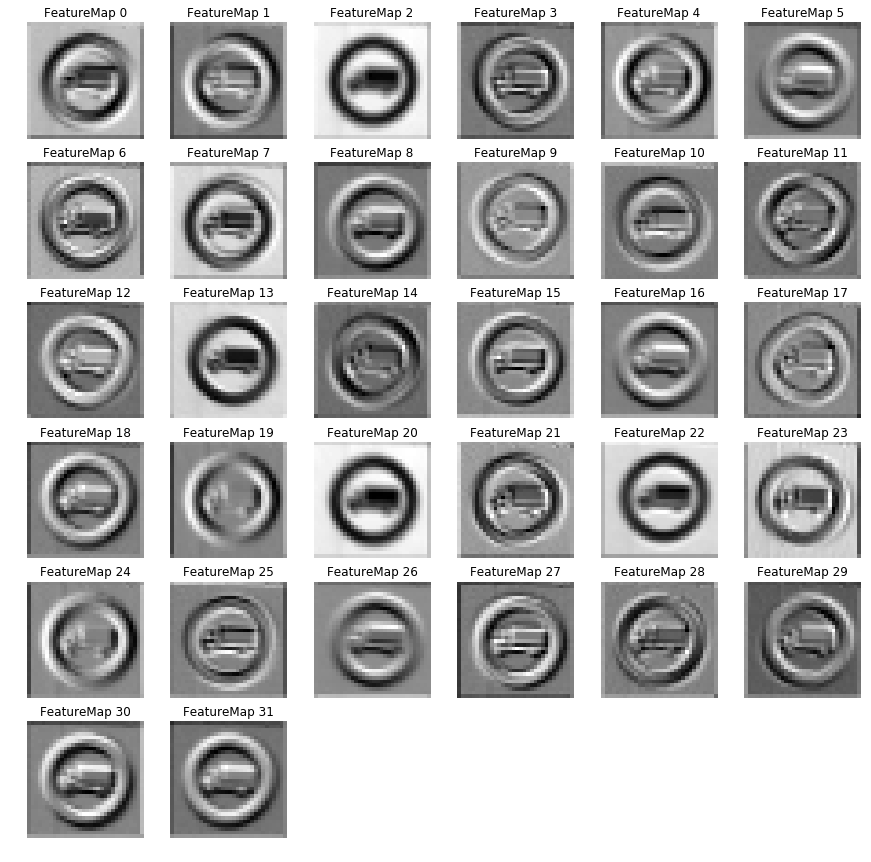

In [17]:
outputFeatureMap(X_test[0])

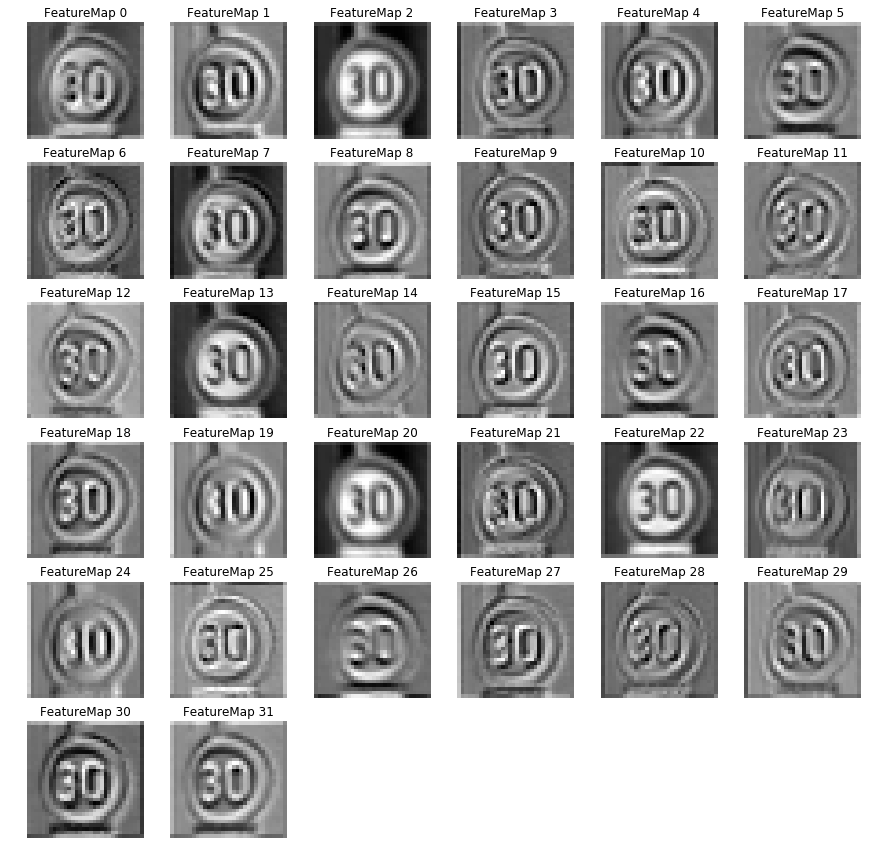

In [18]:
outputFeatureMap(X_test[1])

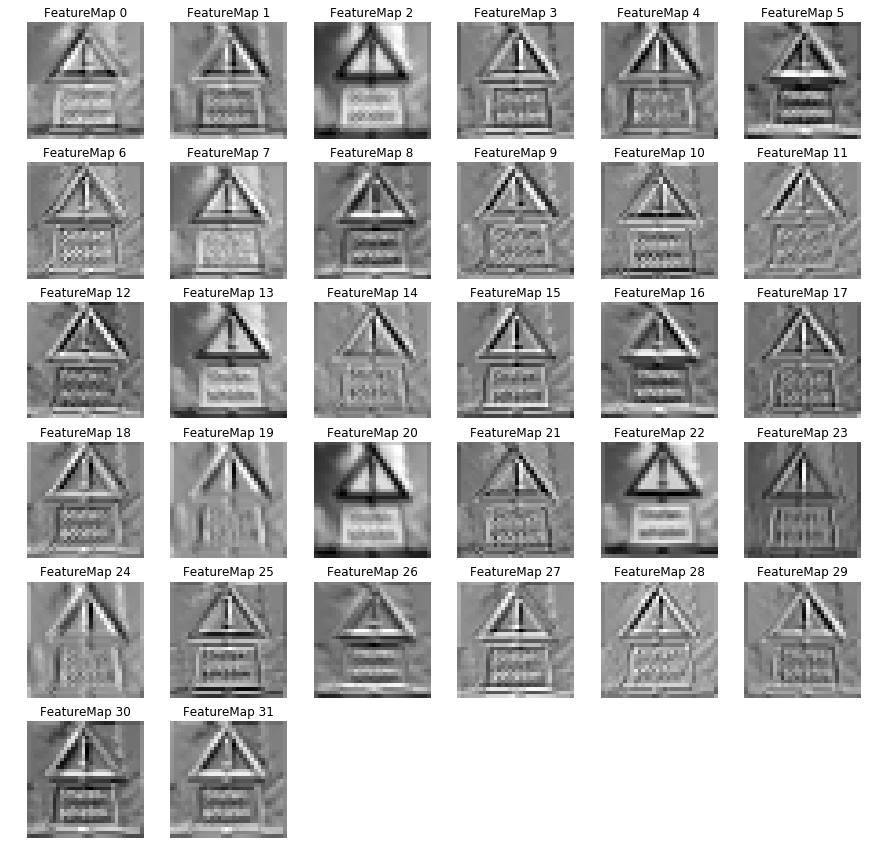

In [22]:
outputFeatureMap(new[0])

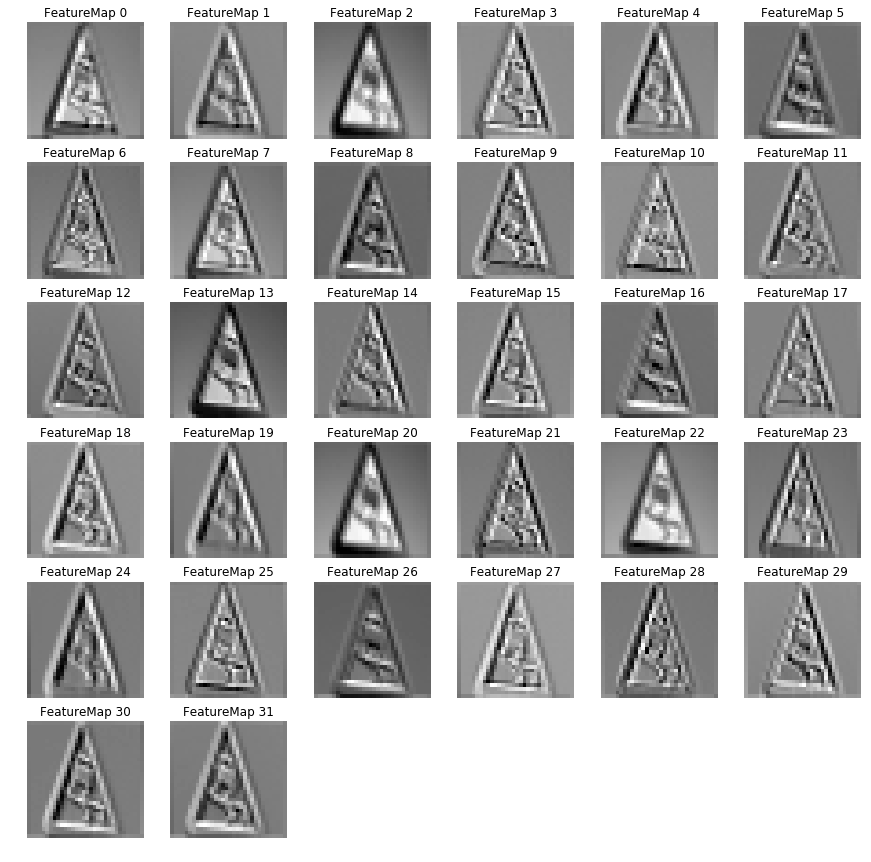

In [23]:
outputFeatureMap(new[2])

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** The first feature map example (X_test[0]) shows very strong reaction to the circular sign.  In some of the feature maps a clear ring stands out in relief.  In a wrongly classified example, new[0], we see that the feature maps react strongly to the small sign below general caution sign.  This probably confused the algorithm leading to the misclassification.  In the final example, new[2], we see strong reaction to the triangular outline of the sign, but not a very clear detection of the drawing on the sign.  This probably led to the misclassification in this case.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# Dead ReLus
Now we look at the average activation of the first and second convolutional layers of the test set.  Are there any neurons that never fire?

In [59]:
tf.reset_default_graph()

In [64]:
X_test = X_test.astype(np.float32)
test_size = X_test.shape[0]

In [65]:
avg_activation1 = np.zeros((32,32,32))
avg_activation2 = np.zeros((32,32,32))
with tf.Session() as sess:
    saver.restore(sess, './vgg_jupyter')
    weights0 = sess.graph.get_tensor_by_name('conv0/weights/read:0').eval()
    weights1a = sess.graph.get_tensor_by_name('conv1a/weights/read:0').eval()
    weights1b = sess.graph.get_tensor_by_name('conv1b/weights/read:0').eval()
    for start in range(0, test_size, BATCH_SIZE):
        end = start + BATCH_SIZE
        batch = X_test[start:end]
        layer0 = tf.nn.conv2d(batch, weights0, strides = [1,1,1,1], padding = 'SAME')
        layer1a = tf.nn.conv2d(layer0, weights1a, strides = [1,1,1,1], padding = 'SAME') 
        activation1 = tf.nn.relu(layer1a)
        avg_activation1 = avg_activation1 + np.sum(activation1.eval(),0)
        layer1b = tf.nn.conv2d(activation1, weights1b, strides = [1,1,1,1], padding = 'SAME')
        activation2 = tf.nn.relu(layer1b)  
        avg_activation2 = avg_activation2 + np.sum(activation2.eval(),0)
avg_activation1 = avg_activation1/test_size
avg_activation2 = avg_activation2/test_size

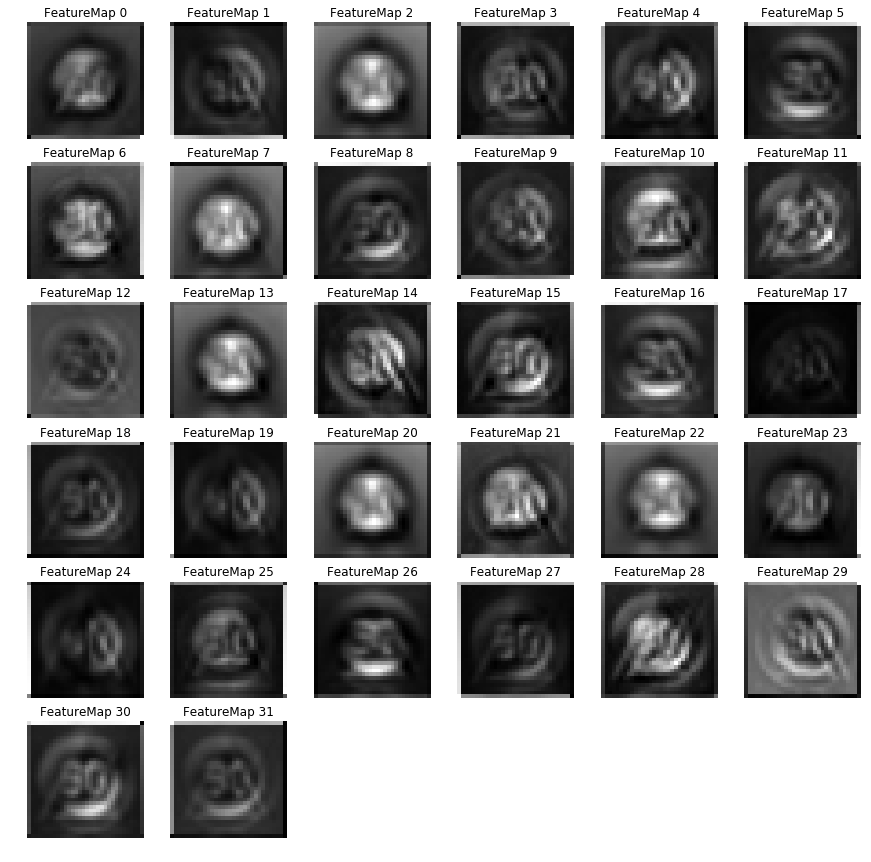

In [66]:
plt.figure(1, figsize=(15,15))
for i in range(avg_activation1.shape[2]):
    plt.subplot(6,6, 1+i) 
    plt.title('FeatureMap ' + str(i))
    plt.axis('off') 
    plt.imshow(avg_activation1[:,:,i], interpolation="nearest", cmap="gray")

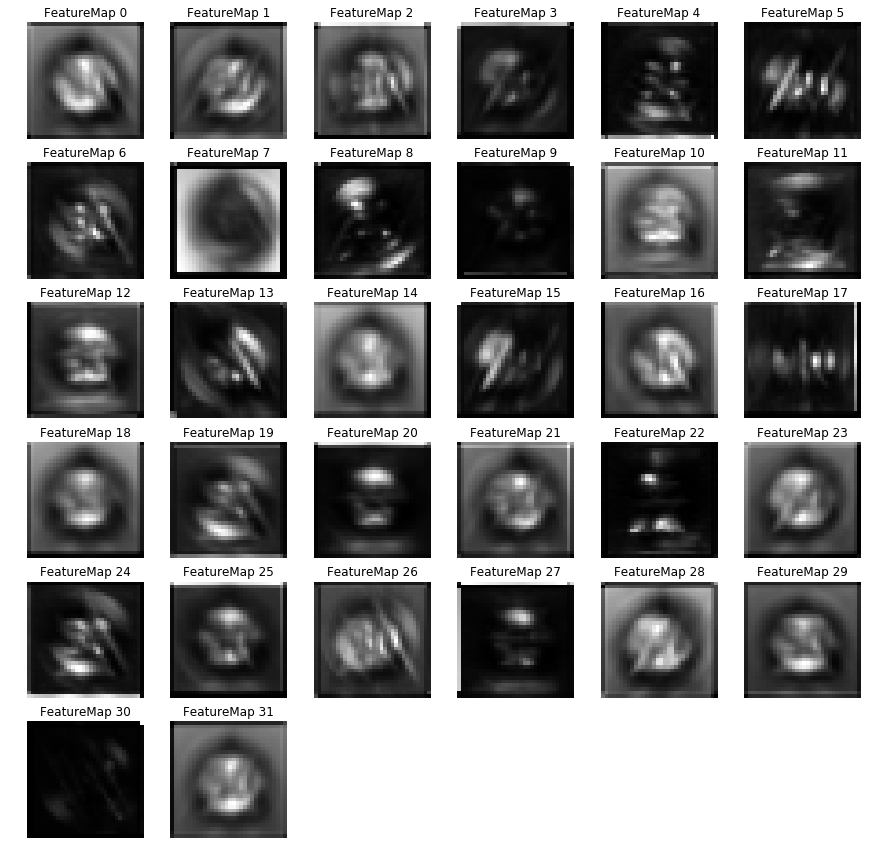

In [67]:
plt.figure(1, figsize=(15,15))
for i in range(avg_activation2.shape[2]):
    plt.subplot(6,6, 1+i) 
    plt.title('FeatureMap ' + str(i))
    plt.axis('off') 
    plt.imshow(avg_activation2[:,:,i], interpolation="nearest", cmap="gray")

In [66]:
with tf.Session() as sess:
    saver.restore(sess, './vgg_jupyter')
    a = sess.graph.get_tensor_by_name('conv1a/conv:0')
    layer1 = a.eval(feed_dict = {x:X_test[:2]})

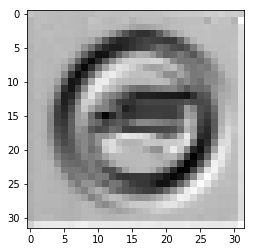

In [67]:
plt.imshow(layer1[0,:,:,0],cmap='gray')

In [80]:
1/test_size

7.917656373713381e-05

In [81]:
np.sum(avg_activation2[:,:,30] < 1e-6)

45

We notice that some feature maps, for example feature maps 9 and 30 of the second convolutional layer, hardly ever have nonzero activation.  It is interesting that this occurs more at the filter level, i.e. a filter that generates strong activations in one part of an image tends to also generate activations in many parts of an image.

### Acknowledgments

In doing this project I greatly benefited from reading the blog posts by [Alex Staravoitau](http://navoshta.com/traffic-signs-classification/), [Vivek Yadav](https://chatbotslife.com/german-sign-classification-using-deep-learning-neural-networks-98-8-solution-d05656bf51ad#.c47d9el83), the solution of [hengck23](https://github.com/hengck23-udacity/udacity-driverless-car-nd-p2), and conversations on Slack and the discussion forum.